# Clothes Size Classification

## Preprocessing

In [63]:
import pandas as pd
import numpy as np

In [64]:
data = pd.read_csv('../data/raw_data.csv')
data

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [66]:
# 1. NaN processing
data.isnull().sum()   # age: 257, height: 330

# Drop NaN
data.dropna(inplace=True)
data

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [67]:
# 2. age dtype: float -> int
data = data.astype({'age':'int'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119153 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119153 non-null  int64  
 1   age     119153 non-null  int32  
 2   height  119153 non-null  float64
 3   size    119153 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 4.1+ MB


In [68]:
# 3. height: rounded to one decimal place
data['height'] = round(data['height'], 1)
data

,weight,age,height,size
0,62,28,172.7,XL
1,59,36,167.6,L
2,61,34,165.1,M
3,65,27,175.3,L
4,62,45,172.7,M
...,...,...,...,...
119729,63,42,175.3,M
119730,45,29,154.9,S
119731,61,31,172.7,M
119732,74,31,167.6,XL


### Change the Age Range

In [69]:
data.describe()        # Age ranges from 0 to 117 -> unreliable

,weight,age,height
count,119153.000000,119153.000000,119153.000000
mean,61.756095,34.032714,165.808586
std,9.942877,8.148302,6.737398
min,22.000000,0.000000,137.200000
25%,55.000000,29.000000,160.000000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.200000
max,136.000000,117.000000,193.000000


In [70]:
# Age range
data.age.value_counts().tail(20)

3      8
71     8
4      8
72     7
5      4
76     4
73     4
14     3
77     2
87     2
85     1
81     1
100    1
113    1
88     1
92     1
99     1
9      1
1      1
112    1
Name: age, dtype: int64

In [71]:
# Data is narrowed down with age between 20~60
data1 = data[(data.age >= 20) & (data.age <= 60)]
data1

,weight,age,height,size
0,62,28,172.7,XL
1,59,36,167.6,L
2,61,34,165.1,M
3,65,27,175.3,L
4,62,45,172.7,M
...,...,...,...,...
119729,63,42,175.3,M
119730,45,29,154.9,S
119731,61,31,172.7,M
119732,74,31,167.6,XL


In [72]:
# Export to csv
data1.to_csv('../data/data1.csv')
print('Export completed-------------------------------------')

Export completed-------------------------------------


### Remove Outliers

In [73]:
data1.describe()

,weight,age,height
count,117375.000000,117375.000000,117375.000000
mean,61.772124,33.877504,165.814159
std,9.939778,7.454046,6.741833
min,22.000000,20.000000,137.200000
25%,55.000000,29.000000,160.000000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.200000
max,136.000000,60.000000,193.000000


In [74]:
# Calculate IQR
q1 = data1.quantile(0.25)    # Return a series
q3 = data1.quantile(0.75)
IQR = q3 - q1
outlier_con = (data1 < q1 - 1.5 * IQR) | (data1 > q3 + 1.5 * IQR)
outlier_con = outlier_con.any(axis=1)   # When there's at least one True, it returns True
outlier_df = data1[outlier_con]    # Outliers
outlier_df

<ipython-input-74-f3dc2d24510c>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_con = (data1 < q1 - 1.5 * IQR) | (data1 > q3 + 1.5 * IQR)
<ipython-input-74-f3dc2d24510c>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_con = (data1 < q1 - 1.5 * IQR) | (data1 > q3 + 1.5 * IQR)


,weight,age,height,size
22,55,50,165.1,S
33,86,48,172.7,XXXL
40,58,52,162.6,XXXL
73,113,27,167.6,XXXL
74,88,30,162.6,XXXL
...,...,...,...,...
119685,87,29,165.1,XXXL
119699,63,50,160.0,XXXL
119704,70,55,165.1,XXXL
119710,77,51,165.1,XXXL


In [75]:
data2 = data1.drop(outlier_df.index, axis=0)
data2     # Data without outliers

,weight,age,height,size
0,62,28,172.7,XL
1,59,36,167.6,L
2,61,34,165.1,M
3,65,27,175.3,L
4,62,45,172.7,M
...,...,...,...,...
119729,63,42,175.3,M
119730,45,29,154.9,S
119731,61,31,172.7,M
119732,74,31,167.6,XL


In [76]:
# Export to excel
data2.to_csv('../data/data2.csv')
print('Export completed------------------------------------')

Export completed------------------------------------


### Remove Outliers by Size

In [77]:
# Define function to remove outlier
def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    condition = (df < q1 - 1.5 * IQR) | (df > q3 + 1.5 * IQR)
    condition = condition.any(axis=1)   # True: outliers
    outlier_index = df[condition].index
    result = df.drop(outlier_index, axis=0)
    return result

if __name__ == '__main__':      # Test the function
    remove_outliers(data2)

<ipython-input-77-9702926857da>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition = (df < q1 - 1.5 * IQR) | (df > q3 + 1.5 * IQR)
<ipython-input-77-9702926857da>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition = (df < q1 - 1.5 * IQR) | (df > q3 + 1.5 * IQR)


In [78]:
# Groupby & apply the function above
df = data2.groupby(['size']).apply(lambda x: remove_outliers(x))
data3 = df.set_index(df.index.get_level_values(1))      # Remove multi-index
data3

<ipython-input-77-9702926857da>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition = (df < q1 - 1.5 * IQR) | (df > q3 + 1.5 * IQR)
<ipython-input-77-9702926857da>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition = (df < q1 - 1.5 * IQR) | (df > q3 + 1.5 * IQR)
<ipython-input-77-9702926857da>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition = (df < q1 - 1.5 * IQR) | (df > q3 + 1.5 * IQR)
<ipython-input-77-9702926857da>:6: FutureWarning: Automatic r

,weight,age,height,size
1,59,36,167.6,L
3,65,27,175.3,L
12,64,26,165.1,L
14,65,33,165.1,L
15,63,30,167.6,L
...,...,...,...,...
119692,76,30,167.6,XXXL
119707,72,44,162.6,XXXL
119720,58,35,167.6,XXXL
119721,62,40,160.0,XXXL


In [79]:
# Export to csv
data3.to_csv('../data/data3.csv')
print('Export completed-------------------------------------------')

Export completed-------------------------------------------


In [80]:
data3.describe()

,weight,age,height
count,104928.000000,104928.000000,104928.000000
mean,60.843388,32.721523,165.716827
std,7.995893,5.913624,6.559870
min,41.000000,20.000000,144.800000
25%,55.000000,29.000000,160.000000
50%,61.000000,32.000000,165.100000
75%,65.000000,36.000000,170.200000
max,85.000000,49.000000,185.400000


## Explore Data

In [81]:
# Check what sizes there are
data1['size'].unique()     # XXS ~ XXXL withoug XS

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL', 'XXL'], dtype=object)

In [82]:
# Check data balance
data1['size'].value_counts()   # Very small number in XXL

M       29191
S       21515
XXXL    20809
XL      18785
L       17249
XXS      9760
XXL        66
Name: size, dtype: int64

## Train/Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# Import data
data = pd.read_csv('../data/data3.csv', index_col=0)
data.tail()

,weight,age,height,size
119692,76,30,167.6,XXXL
119707,72,44,162.6,XXXL
119720,58,35,167.6,XXXL
119721,62,40,160.0,XXXL
119727,68,28,170.2,XXXL


In [85]:
X = data[['age', 'height', 'weight']]
y = data['size']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
X_train.shape, y_test.shape

((73449, 3), (31479,))

## X data standardization

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
# X_train: fit & transform
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_train_sc

array([[-0.80196453,  1.06632893,  0.89425032],
       [ 0.54752799, -0.09407571, -0.60708781],
       [-0.63327797, -0.09407571,  0.51891579],
       ...,
       [-0.80196453, -0.47578776, -0.35686479],
       [ 1.39096081,  1.84502152,  0.51891579],
       [ 1.05358768, -1.65146089, -0.85731083]])

In [89]:
# X_test: transform
X_test_sc = scaler.transform(X_test)
X_test_sc

array([[-0.4645914 ,  1.46330947,  0.51891579],
       [ 2.57176676,  2.22673357,  0.89425032],
       [ 0.21015486, -1.65146089,  0.01846974],
       ...,
       [-0.80196453, -0.47578776, -1.73309141],
       [-0.97065109,  1.46330947,  0.89425032],
       [-0.29590484, -0.47578776,  0.01846974]])

## Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
logi = LogisticRegression(solver='saga')    # multiclass solver needed
logi.fit(X_train_sc, y_train)

LogisticRegression(solver='saga')

In [92]:
# Accuracy
logi.score(X_test_sc, y_test)

0.5141840592140793

In [93]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, logi.predict(X_test_sc), zero_division=0))   # Due to the warning, zero_division is set

              precision    recall  f1-score   support

           L       0.37      0.14      0.20      4809
           M       0.48      0.67      0.56      8262
           S       0.50      0.50      0.50      5787
          XL       0.43      0.47      0.45      5115
         XXL       0.00      0.00      0.00        10
         XXS       0.61      0.46      0.52      2722
        XXXL       0.73      0.73      0.73      4774

    accuracy                           0.51     31479
   macro avg       0.44      0.42      0.42     31479
weighted avg       0.51      0.51      0.50     31479



> **Accuracy: 51.4%, f1 score(weighted): 0.50**

The warning appears without zero_division, as there are some labels that appear in `y_test` but not in `y_pred`. The label can be found through processes as below, and it is `XXL`. References: https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi

In [94]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, logi.predict(X_test_sc))

array([[ 670, 2274,  157, 1513,    0,    2,  193],
       [ 539, 5516, 1466,  639,    0,   81,   21],
       [  21, 2176, 2881,    1,    0,  708,    0],
       [ 495, 1113,   55, 2388,    0,    0, 1064],
       [   0,    2,    0,    4,    0,    0,    4],
       [   0,  220, 1255,    0,    0, 1247,    0],
       [ 103,  139,    0, 1048,    0,    0, 3484]], dtype=int64)

In [95]:
logi.classes_    # The order of labels above

array(['L', 'M', 'S', 'XL', 'XXL', 'XXS', 'XXXL'], dtype=object)

In [96]:
# y_pred
pd.DataFrame(logi.predict(X_test_sc)).value_counts()

M       11440
S        5814
XL       5593
XXXL     4766
XXS      2038
L        1828
dtype: int64

In [97]:
set(y_test) - set(logi.predict(X_test_sc))

{'XXL'}

## Support Vector Machine

In [98]:
from sklearn.svm import SVC    # Support Vector Classification

* C: the bigger, the harder margin
* gamma: the bigger, the more overfitted

In [99]:
svm = SVC()
svm.fit(X_train_sc, y_train)   # Takes 3m

SVC()

In [100]:
# Explore trributes
svm.classes_

array(['L', 'M', 'S', 'XL', 'XXL', 'XXS', 'XXXL'], dtype=object)

In [101]:
svm.fit_status_    # Correctly fitted: 0

0

In [102]:
len(svm.support_)    # Indices of support vectors

66423

In [103]:
svm.support_vectors_

array([[-0.80196453,  1.06632893,  0.89425032],
       [-0.63327797,  0.68461688,  0.51891579],
       [ 0.04146829,  0.68461688,  0.01846974],
       ...,
       [ 0.71621455,  1.06632893,  1.39469636],
       [ 0.21015486, -0.47578776, -0.4819763 ],
       [ 1.05358768, -0.09407571,  1.14447334]])

In [104]:
svm.shape_fit_    # (dimensions of training vector X, features)

(73449, 3)

In [105]:
# Evaluation
svm.score(X_test_sc, y_test)

0.5141522920041933

### Grid Search for Hyperparameters

In [106]:
from sklearn.model_selection import GridSearchCV

#### Grid Search Model 1

In [107]:
svm = SVC()
params = {'kernel':['poly', 'rbf'], 'C':[0.1, 1], 'gamma':[0.5, 1]} 
clf = GridSearchCV(svm, params, cv=5)

In [108]:
clf.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.5, 1],
                         'kernel': ['poly', 'rbf']})

In [109]:
clf.cv_results_    # rbf showed the explicitly better result

{'mean_fit_time': array([207.83548775, 147.47092576, 112.42045007,  97.5963789 ,
        126.71727905,  99.00942907, 628.19286122, 227.03079486]),
 'std_fit_time': array([ 2.41709841, 55.34679711,  0.97776991,  2.58728862,  1.73108682,
         2.7442667 , 33.13761565,  0.34135009]),
 'mean_score_time': array([ 43.52637701,  82.3354569 ,  18.40426974,  53.69514065,
         20.13799877,  54.59064898,  43.67316985, 115.01285572]),
 'std_score_time': array([ 0.56824986, 34.55075057,  0.20548713,  1.43563496,  0.53510475,
         1.4600689 ,  0.53526383,  0.46342148]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.5, 0.5, 1, 1, 0.5, 0.5, 1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=[

In [110]:
clf.best_score_

0.512219418716376

In [111]:
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [112]:
clf.best_estimator_

SVC(C=1, gamma=1)

In [113]:
# Evaluation
clf.score(X_test_sc, y_test)

0.5171384097334731

#### Grid Search Model 2

In [114]:
svm = SVC()
params = {'kernel':['rbf'], 'C':[0.01, 0.05], 'gamma':[1, 5]} 
clf = GridSearchCV(svm, params, cv=5)

In [115]:
clf.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.05], 'gamma': [1, 5], 'kernel': ['rbf']})

In [116]:
clf.cv_results_

{'mean_fit_time': array([253.49895635, 361.9177525 , 217.95765224, 282.88035984]),
 'std_fit_time': array([0.55717962, 1.34736615, 0.67445198, 1.21541536]),
 'mean_score_time': array([122.75625844, 126.27970662, 117.7193491 , 111.95638456]),
 'std_score_time': array([ 0.69761038,  0.6130128 ,  0.5415053 , 16.78603998]),
 'param_C': masked_array(data=[0.01, 0.01, 0.05, 0.05],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[1, 5, 1, 5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'},
  {'C': 0.01, 'gamma': 5, 'kernel': 'rbf'},
  {'C': 0.05, 'gamma': 1, 'kernel': 'rbf'},
  {'C': 0.05, 'gamma': 5, 'kernel': 'rbf'}],
 'split0_test_score

In [117]:
clf.best_score_

0.5117292476678135

In [118]:
clf.best_params_

{'C': 0.05, 'gamma': 5, 'kernel': 'rbf'}

In [119]:
clf.best_estimator_

SVC(C=0.05, gamma=5)

In [120]:
# Evaluation
clf.score(X_test_sc, y_test)

0.5165348327456399

#### Grid Search 3

In [165]:
svm = SVC()
params = {'kernel':['rbf'], 'C':[5, 10], 'gamma':[5, 10]} 
clf = GridSearchCV(svm, params, cv=5)

In [166]:
clf.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [5, 10], 'gamma': [5, 10], 'kernel': ['rbf']})

In [167]:
clf.best_params_

{'C': 5, 'gamma': 5, 'kernel': 'rbf'}

In [168]:
clf.score(X_test_sc, y_test)

0.5178055211410781

> **Best parameter among above: `kernel` = rbf, `C` = 5, `gamma` = 5** <br>
> **Accuracy: 51.8%**

## K-nearest Neighbors

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
# Grid search for the number of neighbors
knn = KNeighborsClassifier()
params = {'n_neighbors': range(5, 52, 2)}
clf = GridSearchCV(knn, params, cv=5, n_jobs=-1)
clf.fit(X_train_sc, y_train)    # Scaling isn't need for KNN

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(5, 52, 2)})

In [123]:
# Fitting result
clf.cv_results_

{'mean_fit_time': array([0.37714691, 0.36595016, 0.4178822 , 0.3705935 , 0.35358515,
        0.33389506, 0.33021202, 0.34921694, 0.33809114, 0.31090355,
        0.33739953, 0.34862323, 0.31730003, 0.34579463, 0.35008111,
        0.33578172, 0.35179119, 0.33598089, 0.32798228, 0.31711345,
        0.33288226, 0.32217956, 0.33550787, 0.31767178]),
 'std_fit_time': array([0.00868779, 0.0163539 , 0.0537522 , 0.03159622, 0.0122502 ,
        0.01085677, 0.01184084, 0.00631339, 0.01967549, 0.0064187 ,
        0.02346686, 0.01511657, 0.01269985, 0.03604895, 0.02611173,
        0.0194813 , 0.02811397, 0.010421  , 0.01798843, 0.01521934,
        0.01069555, 0.00776309, 0.02197554, 0.01311173]),
 'mean_score_time': array([0.84586139, 0.83886008, 0.94255137, 0.91066589, 0.87295933,
        0.91598067, 0.83627238, 0.90834494, 0.94175229, 0.85849013,
        0.92957458, 1.01509547, 0.94127293, 1.00469713, 1.07370915,
        1.13112025, 0.99419155, 1.090869  , 1.08376555, 1.05231128,
        1.097721

> Best parameter=49

In [173]:
# Evaluation with best parameter setting
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(X_train_sc, y_train)
knn.score(X_test_sc, y_test)

0.5096731154102735

In [175]:
clf.score(X_test_sc, y_test)

0.5178055211410781

In [174]:
print(classification_report(y_test, knn.predict(X_test_sc), zero_division=0))

              precision    recall  f1-score   support

           L       0.36      0.26      0.30      4809
           M       0.49      0.61      0.54      8262
           S       0.49      0.54      0.51      5787
          XL       0.44      0.41      0.43      5115
         XXL       0.00      0.00      0.00        10
         XXS       0.61      0.43      0.50      2722
        XXXL       0.74      0.71      0.72      4774

    accuracy                           0.51     31479
   macro avg       0.45      0.42      0.43     31479
weighted avg       0.51      0.51      0.50     31479



> **Accuracy: 51.8%, f1-score(weighted): 0.50**

## Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [127]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt.fit(X_train, y_train)    # doesn't need to standardize
dt.score(X_test, y_test)

0.5067822993106516

[Text(1395.0, 2989.7999999999997, 'height <= 62.5\ngini = 0.818\nsamples = 73449\nvalue = [11150, 19059, 13459, 12298, 48, 6375, 11060]\nclass = y[1]'),
 Text(637.3706896551724, 2446.2, 'height <= 54.5\ngini = 0.742\nsamples = 44914\nvalue = [5505, 16066, 13459, 3011, 8, 6375, 490]\nclass = y[1]'),
 Text(264.5689655172414, 1902.6, 'height <= 49.5\ngini = 0.65\nsamples = 17342\nvalue = [312, 3382, 7823, 115, 1, 5709, 0]\nclass = y[2]'),
 Text(96.20689655172414, 1358.9999999999998, 'height <= 45.5\ngini = 0.515\nsamples = 4957\nvalue = [0, 222, 1798, 0, 0, 2937, 0]\nclass = y[5]'),
 Text(48.10344827586207, 815.3999999999996, 'gini = 0.0\nsamples = 588\nvalue = [0, 0, 0, 0, 0, 588, 0]\nclass = y[5]'),
 Text(144.31034482758622, 815.3999999999996, 'weight <= 37.5\ngini = 0.539\nsamples = 4369\nvalue = [0, 222, 1798, 0, 0, 2349, 0]\nclass = y[5]'),
 Text(96.20689655172414, 271.7999999999997, 'gini = 0.527\nsamples = 3747\nvalue = [0, 170, 1459, 0, 0, 2118, 0]\nclass = y[5]'),
 Text(192.41379

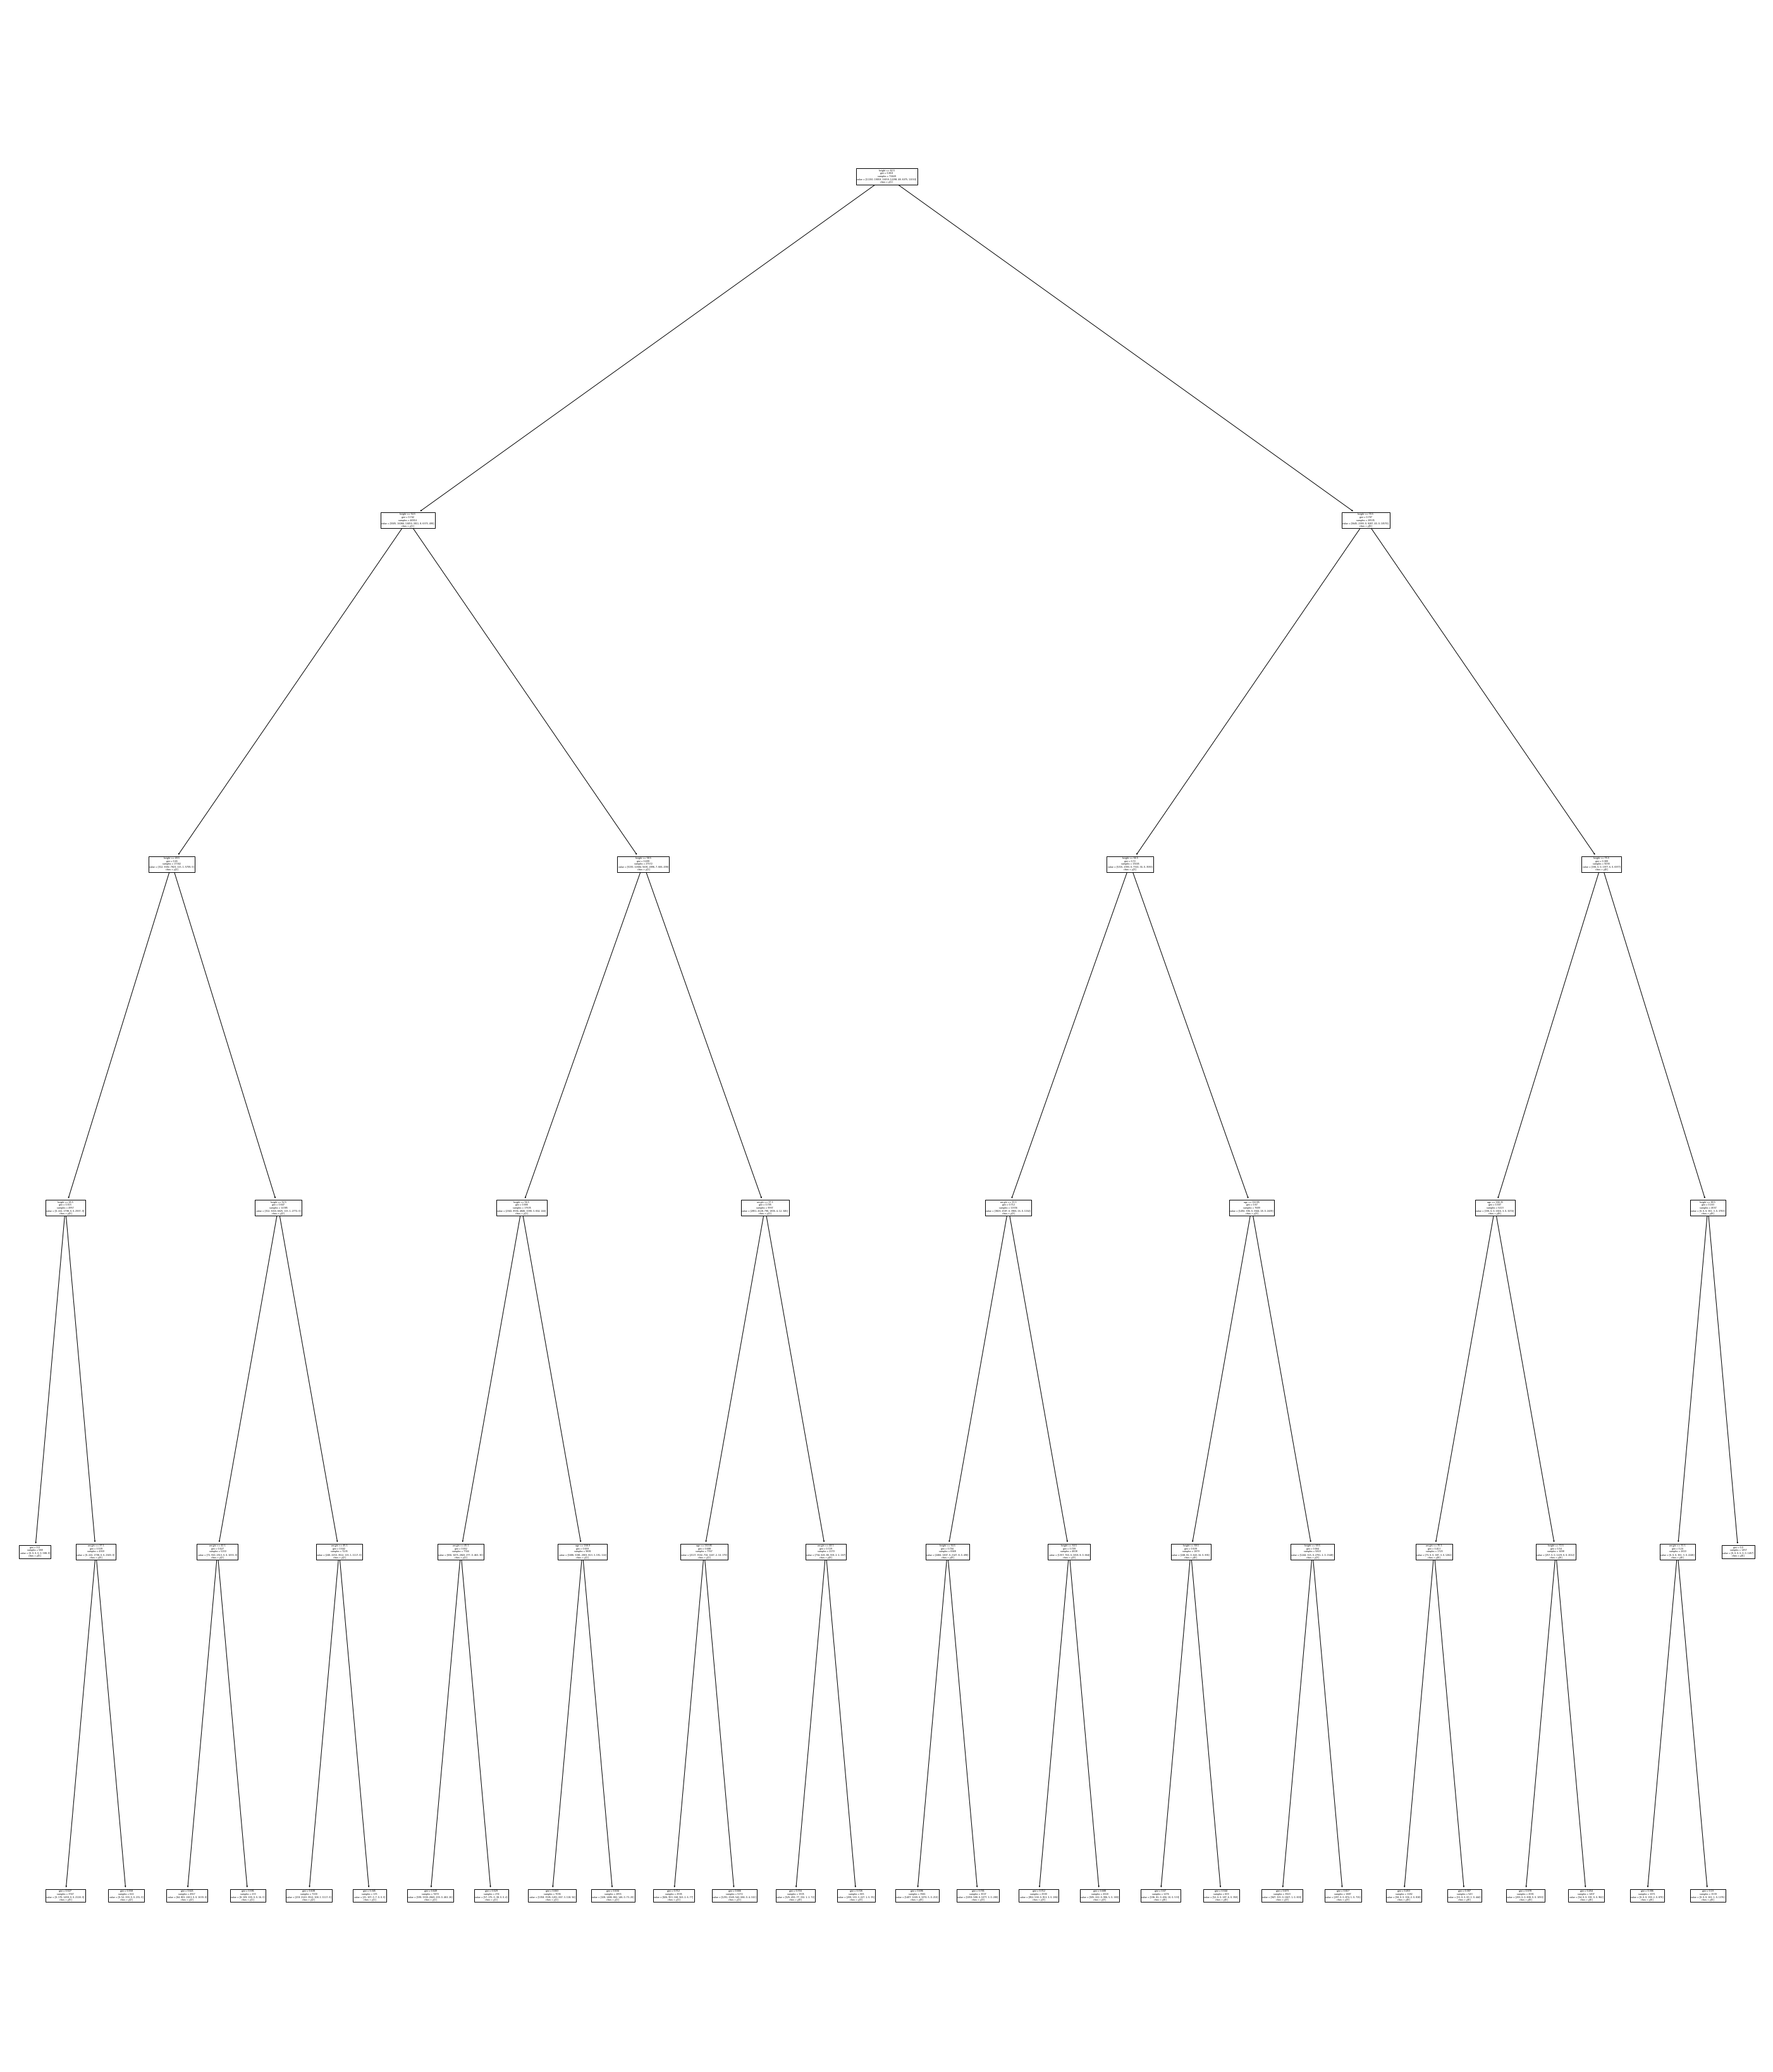

In [128]:
# Plot tree
plt.figure(figsize=(50, 60))
plot_tree(dt, feature_names=['weight', 'age', 'height'], class_names=True)

In [129]:
# Evaluation
print(classification_report(y_test, dt.predict(X_test), zero_division=0))

              precision    recall  f1-score   support

           L       0.36      0.18      0.24      4809
           M       0.48      0.65      0.55      8262
           S       0.50      0.47      0.48      5787
          XL       0.41      0.48      0.44      5115
         XXL       0.00      0.00      0.00        10
         XXS       0.64      0.43      0.51      2722
        XXXL       0.71      0.71      0.71      4774

    accuracy                           0.51     31479
   macro avg       0.44      0.42      0.42     31479
weighted avg       0.50      0.51      0.49     31479



> **Accuracy: 50.7%, f1-score(weighted): 0.49**

## Naive Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB

In [131]:
nb = GaussianNB()
nb.fit(X_train_sc, y_train)
nb.score(X_test_sc, y_test)

0.48448171797071066

In [132]:
print(classification_report(y_test, nb.predict(X_test_sc)))

C:\Users\SK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           L       0.35      0.19      0.24      4809
           M       0.45      0.60      0.52      8262
           S       0.45      0.49      0.47      5787
          XL       0.41      0.40      0.40      5115
         XXL       0.00      0.00      0.00        10
         XXS       0.57      0.49      0.53      2722
        XXXL       0.74      0.67      0.70      4774

    accuracy                           0.48     31479
   macro avg       0.42      0.40      0.41     31479
weighted avg       0.48      0.48      0.48     31479



C:\Users\SK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> **Accuracy: 48.4%, f1-score(weighted): 0.48**

## Ensemble Model 1)  Voting

In [133]:
from sklearn.ensemble import VotingClassifier

In [176]:
# All classification models used above
# Soft voting
logi = LogisticRegression(solver='saga')
svm = SVC(kernel='rbf', C=5, gamma=5, probability=True)
knn = KNeighborsClassifier(n_neighbors=49)
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
nb = GaussianNB()

vot = VotingClassifier(estimators=[('logi', logi), ('svm', svm), ('knn', knn), ('dt', dt), ('nb', nb)], voting='soft')

In [177]:
vot.fit(X_train_sc, y_train)
vot.score(X_test_sc, y_test)

0.5192350455859461

In [178]:
# Hard voting
vot = VotingClassifier(estimators=[('logi', logi), ('svm', svm), ('knn', knn), ('dt', dt), ('nb', nb)], voting='hard')

In [179]:
vot.fit(X_train_sc, y_train)
vot.score(X_test_sc, y_test)

0.5181867276597096

> **Soft Voting: Accuracy: 51.9%**

## Ensemble Model 2) Bagging - Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf = RandomForestClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, n_jobs=-1)
rf.fit(X_train, y_train)    # Decision tree doesn't need scaling
rf.score(X_test, y_test)

0.5026525620254773

In [138]:
# Attributes of random forest classifier
print('Estimators:', rf.estimators_)
print('Base estimator:', rf.base_estimator_)
print('Features:', rf.n_features_)
print('Outputs:', rf.n_outputs_)
print('Feature importances:', rf.feature_importances_)  # The higher, the more important the feature. 

Estimators: [DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=5,
                       min_samples_split=10, random_state=1194545674), DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=5,
                       min_samples_split=10, random_state=1014892200), DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=5,
                       min_samples_split=10, random_state=1613952528), DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=5,
                       min_samples_split=10, random_state=1171057185), DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=5,
                       min_samples_split=10, random_state=594914993), DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=5,
                       min_samples_split=10, random_state=670946744), DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=5,
                       m

In [212]:
# Grid search - Selected!!
rf = RandomForestClassifier()
params = {'max_depth':[5, 7, 9, 11], 'min_samples_split':[10, 20, 30, 50], 'min_samples_leaf':[5, 10, 15]}
rf_clf = GridSearchCV(rf, params, cv=5, n_jobs=-1)

In [213]:
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.5218717240064805

In [214]:
rf_clf.best_params_

{'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 20}

In [215]:
print(classification_report(y_test, rf_clf.predict(X_test), zero_division=0))

              precision    recall  f1-score   support

           L       0.38      0.23      0.29      4809
           M       0.50      0.64      0.56      8262
           S       0.50      0.54      0.52      5787
          XL       0.45      0.43      0.44      5115
         XXL       0.00      0.00      0.00        10
         XXS       0.62      0.45      0.52      2722
        XXXL       0.74      0.72      0.73      4774

    accuracy                           0.52     31479
   macro avg       0.45      0.43      0.44     31479
weighted avg       0.52      0.52      0.51     31479



> **Accuracy: 52.3%, f1-score(weighted): 0.51**

### Pickle the Best Model

In [216]:
# Dump into pickle
import pickle

with open('best_model.pickle', 'wb') as f:
    pickle.dump(rf_clf, f)

In [217]:
# Load pickle
with open('best_model.pickle', 'rb') as f:
    model = pickle.load(f)
model.score(X_test, y_test)

0.5218717240064805

## Ensemble Model 3) Boosting - XGboost

In [143]:
# Install Xgboost library
!pip install C:\Users\SK\anaconda3\Lib\site-packages\xgboost-1.4.2-cp38-cp38-win_amd64.whl

Processing c:\users\sk\anaconda3\lib\site-packages\xgboost-1.4.2-cp38-cp38-win_amd64.whl
xgboost is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [144]:
from xgboost import XGBClassifier

In [145]:
# Prepare validation set from train set
X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(X_train, y_train, test_size=0.3, random_state=5)
X_train_xgb.shape, y_val_xgb.shape    # Standardization isn't needed

((51414, 3), (22035,))

In [146]:
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, n_jobs=16, max_depth=10, objective='multi:softmax')
xgb.fit(X_train_xgb, y_train_xgb, eval_set=[(X_val_xgb, y_val_xgb)], eval_metric='mlogloss', early_stopping_rounds=100)

[0]	validation_0-mlogloss:1.84267
[1]	validation_0-mlogloss:1.75899
[2]	validation_0-mlogloss:1.68873


C:\Users\SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[3]	validation_0-mlogloss:1.62859
[4]	validation_0-mlogloss:1.57654
[5]	validation_0-mlogloss:1.53106
[6]	validation_0-mlogloss:1.49110
[7]	validation_0-mlogloss:1.45568
[8]	validation_0-mlogloss:1.42419
[9]	validation_0-mlogloss:1.39616
[10]	validation_0-mlogloss:1.37086
[11]	validation_0-mlogloss:1.34811
[12]	validation_0-mlogloss:1.32756
[13]	validation_0-mlogloss:1.30887
[14]	validation_0-mlogloss:1.29190
[15]	validation_0-mlogloss:1.27656
[16]	validation_0-mlogloss:1.26258
[17]	validation_0-mlogloss:1.24987
[18]	validation_0-mlogloss:1.23825
[19]	validation_0-mlogloss:1.22762
[20]	validation_0-mlogloss:1.21789
[21]	validation_0-mlogloss:1.20893
[22]	validation_0-mlogloss:1.20060
[23]	validation_0-mlogloss:1.19297
[24]	validation_0-mlogloss:1.18595
[25]	validation_0-mlogloss:1.17940
[26]	validation_0-mlogloss:1.17343
[27]	validation_0-mlogloss:1.16789
[28]	validation_0-mlogloss:1.16273
[29]	validation_0-mlogloss:1.15790
[30]	validation_0-mlogloss:1.15344
[31]	validation_0-mlogloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [147]:
# Predict with test data
y_pred = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.5190126751167445

In [148]:
# Evaluation
import warnings
warnings.filterwarnings('ignore')   # To stop getting warning messages

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           L       0.38      0.20      0.26      4809
           M       0.49      0.63      0.55      8262
           S       0.50      0.55      0.52      5787
          XL       0.44      0.47      0.45      5115
         XXL       0.00      0.00      0.00        10
         XXS       0.61      0.45      0.52      2722
        XXXL       0.74      0.70      0.72      4774

    accuracy                           0.52     31479
   macro avg       0.45      0.43      0.43     31479
weighted avg       0.52      0.52      0.51     31479



### Grid Search 1

In [149]:
xgb = XGBClassifier(n_jobs=16, objective='multi:softmax')
params = {'n_estimators':[500], 'learning_rate':[0.001, 0.01], 'max_depth':[5, 15]}

clf = GridSearchCV(xgb, params, cv=5, n_jobs=-1, scoring='accuracy')
clf.fit(X_train_xgb, y_train_xgb, eval_set=[(X_val_xgb, y_val_xgb)], eval_metric='mlogloss', early_stopping_rounds=100)

[0]	validation_0-mlogloss:1.94484
[1]	validation_0-mlogloss:1.94377
[2]	validation_0-mlogloss:1.94271
[3]	validation_0-mlogloss:1.94164
[4]	validation_0-mlogloss:1.94058
[5]	validation_0-mlogloss:1.93952
[6]	validation_0-mlogloss:1.93847
[7]	validation_0-mlogloss:1.93741
[8]	validation_0-mlogloss:1.93636
[9]	validation_0-mlogloss:1.93531
[10]	validation_0-mlogloss:1.93426
[11]	validation_0-mlogloss:1.93322
[12]	validation_0-mlogloss:1.93218
[13]	validation_0-mlogloss:1.93114
[14]	validation_0-mlogloss:1.93010
[15]	validation_0-mlogloss:1.92906
[16]	validation_0-mlogloss:1.92803
[17]	validation_0-mlogloss:1.92700
[18]	validation_0-mlogloss:1.92597
[19]	validation_0-mlogloss:1.92494
[20]	validation_0-mlogloss:1.92391
[21]	validation_0-mlogloss:1.92289
[22]	validation_0-mlogloss:1.92187
[23]	validation_0-mlogloss:1.92085
[24]	validation_0-mlogloss:1.91983
[25]	validation_0-mlogloss:1.91882
[26]	validation_0-mlogloss:1.91781
[27]	validation_0-mlogloss:1.91680
[28]	validation_0-mlogloss:1.9

[231]	validation_0-mlogloss:1.74508
[232]	validation_0-mlogloss:1.74437
[233]	validation_0-mlogloss:1.74367
[234]	validation_0-mlogloss:1.74297
[235]	validation_0-mlogloss:1.74227
[236]	validation_0-mlogloss:1.74157
[237]	validation_0-mlogloss:1.74087
[238]	validation_0-mlogloss:1.74017
[239]	validation_0-mlogloss:1.73947
[240]	validation_0-mlogloss:1.73878
[241]	validation_0-mlogloss:1.73808
[242]	validation_0-mlogloss:1.73739
[243]	validation_0-mlogloss:1.73670
[244]	validation_0-mlogloss:1.73601
[245]	validation_0-mlogloss:1.73532
[246]	validation_0-mlogloss:1.73463
[247]	validation_0-mlogloss:1.73394
[248]	validation_0-mlogloss:1.73325
[249]	validation_0-mlogloss:1.73257
[250]	validation_0-mlogloss:1.73188
[251]	validation_0-mlogloss:1.73120
[252]	validation_0-mlogloss:1.73052
[253]	validation_0-mlogloss:1.72983
[254]	validation_0-mlogloss:1.72915
[255]	validation_0-mlogloss:1.72847
[256]	validation_0-mlogloss:1.72779
[257]	validation_0-mlogloss:1.72712
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:1.60859
[460]	validation_0-mlogloss:1.60808
[461]	validation_0-mlogloss:1.60757
[462]	validation_0-mlogloss:1.60706
[463]	validation_0-mlogloss:1.60656
[464]	validation_0-mlogloss:1.60605
[465]	validation_0-mlogloss:1.60555
[466]	validation_0-mlogloss:1.60504
[467]	validation_0-mlogloss:1.60454
[468]	validation_0-mlogloss:1.60404
[469]	validation_0-mlogloss:1.60353
[470]	validation_0-mlogloss:1.60303
[471]	validation_0-mlogloss:1.60253
[472]	validation_0-mlogloss:1.60203
[473]	validation_0-mlogloss:1.60153
[474]	validation_0-mlogloss:1.60103
[475]	validation_0-mlogloss:1.60054
[476]	validation_0-mlogloss:1.60004
[477]	validation_0-mlogloss:1.59954
[478]	validation_0-mlogloss:1.59905
[479]	validation_0-mlogloss:1.59855
[480]	validation_0-mlogloss:1.59806
[481]	validation_0-mlogloss:1.59756
[482]	validation_0-mlogloss:1.59707
[483]	validation_0-mlogloss:1.59657
[484]	validation_0-mlogloss:1.59608
[485]	validation_0-mlogloss:1.59559
[486]	validation_0-mlogloss:

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=16,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
        

In [150]:
print(clf.best_params_)
print(clf.best_estimator_)

{'learning_rate': 0.001, 'max_depth': 15, 'n_estimators': 500}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [151]:
# Evaluation
clf.score(X_test, y_test)

0.5143746624733949

### Grid Search 2

In [152]:
# Grid search 2
xgb = XGBClassifier(n_jobs=16, objective='multi:softmax')
params = {'n_estimators':[600], 'learning_rate':[0.001, 0.01], 'max_depth':[5, 10]}

clf = GridSearchCV(xgb, params, cv=5, n_jobs=-1, scoring='accuracy')
clf.fit(X_train_xgb, y_train_xgb, eval_set=[(X_val_xgb, y_val_xgb)], eval_metric='mlogloss', early_stopping_rounds=100)

[0]	validation_0-mlogloss:1.93529
[1]	validation_0-mlogloss:1.92489
[2]	validation_0-mlogloss:1.91471
[3]	validation_0-mlogloss:1.90475
[4]	validation_0-mlogloss:1.89498
[5]	validation_0-mlogloss:1.88539
[6]	validation_0-mlogloss:1.87599
[7]	validation_0-mlogloss:1.86677
[8]	validation_0-mlogloss:1.85771
[9]	validation_0-mlogloss:1.84882
[10]	validation_0-mlogloss:1.84010
[11]	validation_0-mlogloss:1.83152
[12]	validation_0-mlogloss:1.82310
[13]	validation_0-mlogloss:1.81481
[14]	validation_0-mlogloss:1.80668
[15]	validation_0-mlogloss:1.79866
[16]	validation_0-mlogloss:1.79078
[17]	validation_0-mlogloss:1.78304
[18]	validation_0-mlogloss:1.77542
[19]	validation_0-mlogloss:1.76793
[20]	validation_0-mlogloss:1.76056
[21]	validation_0-mlogloss:1.75331
[22]	validation_0-mlogloss:1.74616
[23]	validation_0-mlogloss:1.73913
[24]	validation_0-mlogloss:1.73220
[25]	validation_0-mlogloss:1.72538
[26]	validation_0-mlogloss:1.71867
[27]	validation_0-mlogloss:1.71204
[28]	validation_0-mlogloss:1.7

[231]	validation_0-mlogloss:1.20276
[232]	validation_0-mlogloss:1.20196
[233]	validation_0-mlogloss:1.20116
[234]	validation_0-mlogloss:1.20037
[235]	validation_0-mlogloss:1.19959
[236]	validation_0-mlogloss:1.19881
[237]	validation_0-mlogloss:1.19804
[238]	validation_0-mlogloss:1.19727
[239]	validation_0-mlogloss:1.19652
[240]	validation_0-mlogloss:1.19577
[241]	validation_0-mlogloss:1.19502
[242]	validation_0-mlogloss:1.19428
[243]	validation_0-mlogloss:1.19354
[244]	validation_0-mlogloss:1.19281
[245]	validation_0-mlogloss:1.19208
[246]	validation_0-mlogloss:1.19136
[247]	validation_0-mlogloss:1.19064
[248]	validation_0-mlogloss:1.18993
[249]	validation_0-mlogloss:1.18922
[250]	validation_0-mlogloss:1.18852
[251]	validation_0-mlogloss:1.18783
[252]	validation_0-mlogloss:1.18714
[253]	validation_0-mlogloss:1.18645
[254]	validation_0-mlogloss:1.18577
[255]	validation_0-mlogloss:1.18510
[256]	validation_0-mlogloss:1.18444
[257]	validation_0-mlogloss:1.18377
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:1.11540
[460]	validation_0-mlogloss:1.11525
[461]	validation_0-mlogloss:1.11511
[462]	validation_0-mlogloss:1.11496
[463]	validation_0-mlogloss:1.11482
[464]	validation_0-mlogloss:1.11468
[465]	validation_0-mlogloss:1.11453
[466]	validation_0-mlogloss:1.11439
[467]	validation_0-mlogloss:1.11425
[468]	validation_0-mlogloss:1.11411
[469]	validation_0-mlogloss:1.11397
[470]	validation_0-mlogloss:1.11383
[471]	validation_0-mlogloss:1.11370
[472]	validation_0-mlogloss:1.11356
[473]	validation_0-mlogloss:1.11343
[474]	validation_0-mlogloss:1.11329
[475]	validation_0-mlogloss:1.11316
[476]	validation_0-mlogloss:1.11302
[477]	validation_0-mlogloss:1.11289
[478]	validation_0-mlogloss:1.11275
[479]	validation_0-mlogloss:1.11262
[480]	validation_0-mlogloss:1.11249
[481]	validation_0-mlogloss:1.11236
[482]	validation_0-mlogloss:1.11223
[483]	validation_0-mlogloss:1.11210
[484]	validation_0-mlogloss:1.11197
[485]	validation_0-mlogloss:1.11185
[486]	validation_0-mlogloss:

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=16,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
        

In [153]:
clf.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 600}

In [154]:
clf.score(X_test, y_test)

0.5189809079068586

> **Accuracy: 51.9%, f1-score(weighted): 0.51**

## Linear Discriminant Analysis (LDA)

In [155]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [156]:
lda = LDA(n_components=2)
lda.fit(X_train_sc, y_train)
lda.score(X_test_sc, y_test)

0.5095460465707297

In [157]:
# For Tableau visualization
X_test_comp = lda.transform(X_test_sc)
X_test_comp    # LDA component1, component2

array([[-0.59081947,  1.30891491],
       [-1.82369588,  2.57797201],
       [-0.42905739, -1.77028635],
       ...,
       [ 3.41933971, -0.0042407 ],
       [-1.20313454,  1.06742517],
       [-0.07038226, -0.58320797]])

In [158]:
lda_df = pd.DataFrame(X_test_comp, columns=['Component 1', 'Component 2'])
lda_df['Prediction'] = lda.predict(X_test_sc)   # Add a column of target
lda_df

,Component 1,Component 2,Prediction
0,-0.590819,1.308915,L
1,-1.823696,2.577972,XL
2,-0.429057,-1.770286,M
3,-0.049638,0.877308,M
4,-1.143651,0.023722,XL
...,...,...,...
31474,0.414566,-0.708678,M
31475,-2.526342,-2.269115,XXXL
31476,3.419340,-0.004241,XXS
31477,-1.203135,1.067425,XL


In [159]:
# Export to csv for Tableau
lda_df.to_csv('../data/data4_age_included.csv')
print('Export completed-------------------------------')

Export completed-------------------------------


### Logistic Regression after LDA

In [160]:
# Transform X by LDA
X_train_comp = lda.transform(X_train_sc)

# Logistic Regression
logi = LogisticRegression()
logi.fit(X_train_comp, y_train)
logi.score(X_test_comp, y_test)   # Not much improved

0.5156135836589473

In [169]:
print(classification_report(y_test, logi.predict(X_test_comp)))

              precision    recall  f1-score   support

           L       0.38      0.14      0.21      4809
           M       0.48      0.67      0.56      8262
           S       0.50      0.50      0.50      5787
          XL       0.43      0.46      0.45      5115
         XXL       0.00      0.00      0.00        10
         XXS       0.62      0.45      0.52      2722
        XXXL       0.73      0.73      0.73      4774

    accuracy                           0.52     31479
   macro avg       0.45      0.42      0.42     31479
weighted avg       0.51      0.52      0.50     31479



> **Accuracy: 51.6%**

## Quadratic Discriminant Analysis (QDA)

In [161]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [162]:
qda = QDA()
qda.fit(X_train_sc, y_train)
qda.score(X_test_sc,y_test)    # Not a big difference with LDA

0.5149782394612281

> **Accuracy: 51.5%**

## Conclusion

**1. Logistic Regression**: Accuracy: 51.4%, f1 score(weighted): 0.50<br>
**2. Support Vector Machine**: Accuracy: 51.8%<br>
**3. K-Nearest Neighbors**: Accuracy: 51.8%, f1-score(weighted): 0.50<br>
**4. Decision Tree**: Accuracy: 50.7%, f1-score(weighted): 0.49<br>
**5. Naive Bayes**: Accuracy: 48.4%, f1-score(weighted): 0.48<br>
**6. Ensemble Model 1) Voting**: Accuracy: 51.9%<br>
**7. Ensemble Model 2) Bagging - Random Forest**: Accuracy: 52.3%, f1-score(weighted): 0.51 **[selected]**<br>
**8. Ensemble Model 3) Boosting - XGboost**: Accuracy: 51.9%, f1-score(weighted): 0.51<br>
**9. Linear Discriminant Analysis**: Accuracy: 51.6%<br>
**10. Quadratic Discriminant Analysis**: Accuracy: 51.5%<br>